# 1. Data Exploration
The dataset is loaded and checked to ensure that the data is ready for analysis, and help us understand how the target variable('y') be influenced by the features.

The code mounts Google Drive in Google Colab allowing access to files stored there, then specifies the path to the CSV file (`TeleCom_Data-2.csv`) so that it can be read by pandas for analysis.

In [18]:
import pprint
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

file_path = "/content/drive/MyDrive/ColabNotebooks/36103/AT3/TeleCom_Data-2.csv"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Read the file into `dataframe_overview` for subsequent data cleaning.

Print and examine the dataset to identify any issues that require preprocessing.

In [19]:
dataframe_overview = pd.read_csv(file_path, header=None)
dataframe_overview.head()
dataframe_overview.info()
dataframe_overview

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41181 entries, 0 to 41180
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       41181 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


,0
0,"age;""job"";""marital"";""education"";""default"";""hou..."
1,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
2,"56;""services"";""married"";""high.school"";""no"";""no..."
3,"45;""services"";""married"";""basic.9y"";""unknown"";""..."
4,"59;""admin."";""married"";""professional.course"";""n..."
...,...
41176,"29;""unemployed"";""single"";""basic.4y"";""no"";""yes""..."
41177,"73;""retired"";""married"";""professional.course"";""..."
41178,"46;""blue-collar"";""married"";""professional.cours..."
41179,"56;""retired"";""married"";""university.degree"";""no..."


## Data Overview
The dataset contains 41,181 rows and 21 columns.

The first row defines the column headers representing the 21 features.

The dataset includes both numerical and categorical variables.

The target variable is ' y ', which is categorical and indicates whether the client subscribed to a Telecom plan.

## 1.1 Data Cleaning

Semicolon (' ; ') delimiters are present in the dataset, which may interfere with subsequent data analysis.

These delimiters are removed, and the dataset is then reviewed to check for any remaining issues.

In [29]:
# Remove semicolon
df = dataframe_overview[0].str.split(";", expand=True)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,age,"""job""","""marital""","""education""","""default""","""housing""","""loan""","""contact""","""month""","""day_of_week""","""duration""","""campaign""","""pdays""","""previous""","""poutcome""","""emp.var.rate""","""cons.price.idx""","""cons.conf.idx""","""euribor3m""","""nr.employed""","""y"""
1,40,"""admin.""","""married""","""basic.6y""","""no""","""no""","""no""","""telephone""","""may""","""mon""",151,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
2,56,"""services""","""married""","""high.school""","""no""","""no""","""yes""","""telephone""","""may""","""mon""",307,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
3,45,"""services""","""married""","""basic.9y""","""unknown""","""no""","""no""","""telephone""","""may""","""mon""",198,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
4,59,"""admin.""","""married""","""professional.course""","""no""","""no""","""no""","""telephone""","""may""","""mon""",139,1,999,0,"""nonexistent""",1.1,93.994,-36.4,4.857,5191,"""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41176,29,"""unemployed""","""single""","""basic.4y""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",112,1,9,1,"""success""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41177,73,"""retired""","""married""","""professional.course""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",334,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""yes"""
41178,46,"""blue-collar""","""married""","""professional.course""","""no""","""no""","""no""","""cellular""","""nov""","""fri""",383,1,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""
41179,56,"""retired""","""married""","""university.degree""","""no""","""yes""","""no""","""cellular""","""nov""","""fri""",189,2,999,0,"""nonexistent""",-1.1,94.767,-50.8,1.028,4963.6,"""no"""


Remove quotation marks (' " ') and set the first row as column names.

Then review the dataset to confirm no remaining formatting issues.

In [30]:

# Removw quotation marks
df = df.map(lambda x: x.strip('"') if isinstance(x, str) else x)

# Set the 1st row as column name
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

print(df.shape)
print(df.head())

(41180, 21)
0 age          job  marital            education  default housing loan  \
0  40       admin.  married             basic.6y       no      no   no   
1  56     services  married          high.school       no      no  yes   
2  45     services  married             basic.9y  unknown      no   no   
3  59       admin.  married  professional.course       no      no   no   
4  41  blue-collar  married              unknown  unknown      no   no   

0    contact month day_of_week duration campaign pdays previous     poutcome  \
0  telephone   may         mon      151        1   999        0  nonexistent   
1  telephone   may         mon      307        1   999        0  nonexistent   
2  telephone   may         mon      198        1   999        0  nonexistent   
3  telephone   may         mon      139        1   999        0  nonexistent   
4  telephone   may         mon      217        1   999        0  nonexistent   

0 emp.var.rate cons.price.idx cons.conf.idx euribor3m nr.emplo

## 1.2 Missing Values

No missing values were found in any column.

In [31]:
df[df.isna().any(axis=1)]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [32]:
dup_cnt = df.duplicated().sum()
print(f"[Info] Duplicates found: {dup_cnt}")

[Info] Duplicates found: 12


In [24]:
if dup_cnt > 0:
    df = df.drop_duplicates().reset_index(drop=True)

In [33]:
dup_cnt = df.duplicated().sum()
print(f"[Info] Duplicates found: {dup_cnt}")

[Info] Duplicates found: 12


## 1.3 Numerical Features and Categorical Features

Iterate each column, converting those that can be represented as numeric values and storing their names in `num_col` as numerical features, while recording the names of categorical feature columns in `obj_col`.

Generate descriptive statistics to better understand the data:


*   for numerical features, report standard deviation, minimum, maximum, Q1, Q2, and Q3;

*   for categorical features, provide category counts.

In [34]:
from collections import Counter

column_name = df.columns
num_col = []
obj_col = []
for i, col in enumerate(column_name): # enumerate() returns both the index(i) and the column name(col) of the column
  counts = Counter(df[col])
  if pd.to_numeric(df[col], errors='coerce').notna().all() :
    # change numerical column
    df[col] = pd.to_numeric(df[col], errors='coerce')
    print("Num_col ", col, ":")
    print(df[col])
    print(df[col].describe())
    num_col.append(col)
  else:
    obj_col.append(col)
    print("Distribution of ", col, ":")
    for rating, count in counts.items():
      print(f'{rating}:{count}')
  print()

Num_col  age :
0        40
1        56
2        45
3        59
4        41
         ..
41175    29
41176    73
41177    46
41178    56
41179    44
Name: age, Length: 41180, dtype: int64
count    41180.000000
mean        40.021710
std         10.419593
min         17.000000
25%         32.000000
50%         38.000000
75%         47.000000
max         98.000000
Name: age, dtype: float64

Distribution of  job :
admin.:10422
services:3967
blue-collar:9253
technician:6742
housemaid:1059
retired:1718
management:2923
unemployed:1014
self-employed:1421
unknown:330
entrepreneur:1456
student:875

Distribution of  marital :
married:24921
single:11568
divorced:4611
unknown:80

Distribution of  education :
basic.6y:2292
high.school:9513
basic.9y:6044
professional.course:5241
unknown:1731
basic.4y:4175
university.degree:12166
illiterate:18

Distribution of  default :
no:32581
unknown:8596
yes:3

Distribution of  housing :
no:18619
yes:21571
unknown:990

Distribution of  loan :
no:33943
yes:6247
unkn

Record the column names of numerical and categorical features.

In [35]:
df_copy = df.copy()
# numerical column
print(num_col)
# object column
print(obj_col)

['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


# 2. Orderd Categorical Features Transformation

Ordered categorical features were transformed into numeric form for further analysis.

Such as

*   Yes-1 No-0 unknown-Nan
*   Success-1 Failure-0 Nonexistent-Nan
*   Customer education level is ordinal, ranging from no formal education to professional training and university education.
*   Marital status may can be ordinal, just have a try.


In [ ]:
import numpy as np

In [36]:
# y: no:36542 yes:4638
df['y'] = df['y'].map({'yes': 1, 'no': 0})
# marital: married:24921 single:11568 divorced:4611 unknown:80
df['marital'] = df['marital'].map({'single': 1, 'married': 2, 'divorced': 3, 'unknown': np.nan})
# basic.6y:2292 high.school:9513 basic.9y:6044 professional.course:5241 unknown:1731 basic.4y:4175 university.degree:12166 illiterate:18
df['education'] = df['education'].map({'illiterate': 0, 'basic.4y': 1, 'basic.6y': 2, 'basic.9y': 3, 'high.school': 4, 'professional.course': 5, 'university.degree': 6, 'unknown': np.nan})
# no:32581 unknown:8596 yes:3
df['default'] = df['default'].map({'yes': 1, 'no': 0, 'unknown': np.nan})
# housing: no:18619 yes:21571 unknown:990
df['housing'] = df['housing'].map({'yes': 1, 'no': 0, 'unknown': np.nan})
# loan: no:33943 yes:6247 unknown:990
df['loan'] = df['loan'].map({'yes': 1, 'no': 0, 'unknown': np.nan})
# poutcome: nonexistent:35559 failure:4250 success:1371
df['poutcome'] = df['poutcome'].map({'success': 1, 'failure': 0, 'nonexistent': np.nan})

level_col = ['marital', 'education', 'default', 'housing', 'loan', 'poutcome']
for col in level_col:
  print(col)
  print(df[col].value_counts())

marital
marital
2.0    24921
1.0    11568
3.0     4611
Name: count, dtype: int64
education
education
6.0    12166
4.0     9513
3.0     6044
5.0     5241
1.0     4175
2.0     2292
0.0       18
Name: count, dtype: int64
default
default
0.0    32581
1.0        3
Name: count, dtype: int64
housing
housing
1.0    21571
0.0    18619
Name: count, dtype: int64
loan
loan
0.0    33943
1.0     6247
Name: count, dtype: int64
poutcome
poutcome
0.0    4250
1.0    1371
Name: count, dtype: int64


# 3. Modeling

## 3.1 Imports and Setting

Deal dumplicates and missing values.

In [37]:
# 0. Imports & Settings

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (roc_auc_score, accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, RocCurveDisplay, ConfusionMatrixDisplay, classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 200)
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# 1. basic cleaning

# lower column name
df.columns = [c.strip().lower() for c in df.columns]
for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].astype(str).str.strip().str.replace('"', '', regex=False)

# find target col
target_col = 'y'  # <- TODO
if df[target_col].dtype == 'object':
    df[target_col] = (df[target_col].str.lower().isin(['yes','1','true'])).astype(int)

# Duplicates found and deal
dup_cnt = df.duplicated().sum()
print(f"[Info] Duplicates found: {dup_cnt}")
if dup_cnt > 0:
    df = df.drop_duplicates().reset_index(drop=True)


[Info] Duplicates found: 12


In [38]:
# Duplicates recheck
dup_cnt = df.duplicated().sum()
print(f"[Info] Duplicates found: {dup_cnt}")

[Info] Duplicates found: 0


In [39]:

# 1.1 Unknown / missing

def _norm_unknown(x):
    if isinstance(x, str) and x.strip().lower() in ['unknown', 'unk', 'na', 'nan', 'none', '']:
        return np.nan
    return x

obj_cols = [c for c in df.columns if df[c].dtype == 'object' and c != target_col]
for c in obj_cols:
    df[c] = df[c].map(_norm_unknown)

# for categorical column: fill na by "Unknown"
for c in obj_cols:
    df[c] = df[c].fillna("Unknown")

# for numerical column: fill na by median
num_cols_all = [c for c in df.columns if c not in obj_cols + [target_col] and pd.api.types.is_numeric_dtype(df[c])]
for c in num_cols_all:
    df[c] = df[c].fillna(df[c].median())


## 3.2 Feature list and Leakage control

In [40]:

# 2. Feature list & leakage control

# feature columns without target column
feature_cols = [c for c in df.columns if c != target_col]

# "duration" will lead leakage
leakage_like = {'duration'}
feature_cols = [c for c in feature_cols if c not in leakage_like]

X_raw = df[feature_cols].copy()
y = df[target_col].copy()

# cat/num cols
categorical_cols = [c for c in X_raw.columns if X_raw[c].dtype == "object"]
numeric_cols = [c for c in X_raw.columns if c not in categorical_cols]

print(f"[Info] #features: {len(feature_cols)} | #cat: {len(categorical_cols)} | #num: {len(numeric_cols)}")


[Info] #features: 19 | #cat: 4 | #num: 15


## 3.3 Data Split

In [47]:
# 3. Train/Val/Test split
X_train_raw, X_temp_raw, y_train, y_temp = train_test_split(
    X_raw, y, test_size=0.30, stratify=y, random_state=RANDOM_STATE
)
X_val_raw, X_test_raw, y_val, y_test = train_test_split(
    X_temp_raw, y_temp, test_size=0.50, stratify=y_temp, random_state=RANDOM_STATE
)
print(f"[Info] Split sizes -> train:{X_train_raw.shape}, val:{X_val_raw.shape}, test:{X_test_raw.shape}")


[Info] Split sizes -> train:(28817, 19), val:(6175, 19), test:(6176, 19)


## 3.4 Preprocess

In [48]:
# 4. Preprocess
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
scaler = StandardScaler(with_mean=True, with_std=True)

preprocess = ColumnTransformer(
    transformers=[
        ("cat", ohe, categorical_cols),
        ("num", scaler, numeric_cols),
    ],
    remainder="drop"
)

# fit and trans
X_train = preprocess.fit_transform(X_train_raw)
X_val   = preprocess.transform(X_val_raw)
X_test  = preprocess.transform(X_test_raw)

# fill col names
ohe_names = list(preprocess.named_transformers_["cat"].get_feature_names_out(categorical_cols)) if categorical_cols else []
all_names = ohe_names + numeric_cols

X_train = pd.DataFrame(X_train, columns=all_names, index=X_train_raw.index)
X_val   = pd.DataFrame(X_val,   columns=all_names, index=X_val_raw.index)
X_test  = pd.DataFrame(X_test,  columns=all_names, index=X_test_raw.index)


## 3.5 Define Function Helper

In [49]:
# 5. Helper: CV & evaluation

def eval_on_split(model, X_tr, y_tr, X_va, y_va, name="model"):
    model.fit(X_tr, y_tr)
    pred_val = model.predict(X_va)
    proba_val = model.predict_proba(X_va)[:,1] if hasattr(model, "predict_proba") else None

    res = {
        "model": name,
        "val_accuracy": accuracy_score(y_va, pred_val),
        "val_precision": precision_score(y_va, pred_val, zero_division=0),
        "val_recall": recall_score(y_va, pred_val, zero_division=0),
        "val_f1": f1_score(y_va, pred_val, zero_division=0),
        "val_auc": roc_auc_score(y_va, proba_val) if proba_val is not None else np.nan
    }
    return res, model

def cv_score(model, X, y, cv=5):
    scoring = {
        "accuracy":"accuracy",
        "precision":"precision",
        "recall":"recall",
        "f1":"f1",
        "roc_auc":"roc_auc"
    }
    kfold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=RANDOM_STATE)
    cvres = cross_validate(model, X, y, cv=kfold, scoring=scoring, n_jobs=-1, return_train_score=False)
    return {f"cv_{k}": np.mean(v) for k,v in cvres.items()}


## 3.6 Model 1: Logistic Regression (Parametric, MLE)

### 3.6.1 Logistic Regression

In [50]:
# 6. Model 1: Logistic Regression (Parametric, MLE)
# Can't Exist mssing value!!!
# Use class_weight='balanced' for inbalance； Use grid find C
lr = LogisticRegression(
    max_iter=1000, solver='lbfgs', class_weight='balanced', n_jobs=-1
)
lr_grid = {"C":[0.1, 0.5, 1.0, 2.0, 5.0]}
g_lr = GridSearchCV(lr, lr_grid, scoring="roc_auc", cv=5, n_jobs=-1, refit=True)
lr_cv_res = cv_score(g_lr, X_train, y_train, cv=5)
lr_split_res, best_lr = eval_on_split(g_lr, X_train, y_train, X_val, y_val, name="LogReg (best-C)")

print("[LR] CV:", lr_cv_res)
print("[LR] Val:", lr_split_res)

[LR] CV: {'cv_fit_time': np.float64(6.975996780395508), 'cv_score_time': np.float64(0.031070709228515625), 'cv_test_accuracy': np.float64(0.8271503114643017), 'cv_test_precision': np.float64(0.3492066146033072), 'cv_test_recall': np.float64(0.6179888585990281), 'cv_test_f1': np.float64(0.4461931076817075), 'cv_test_roc_auc': np.float64(0.787639179983162)}
[LR] Val: {'model': 'LogReg (best-C)', 'val_accuracy': 0.8372469635627531, 'val_precision': 0.3714759535655058, 'val_recall': 0.6446043165467625, 'val_f1': 0.4713308784850079, 'val_auc': np.float64(0.8040510948905109)}


### 3.6.2 Parameter Estimation and Interpretation of Model 1: Logistic Regression

In [45]:
# Logistic: Parameter Estimation and Interpretation (MLE)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# 1) secure preprocession: avoid naming conflicts
if 'X_train_raw_conv' in globals():
    X_train_sm_raw = X_train_raw_conv.copy()
else:
    X_train_sm_raw = X_train_raw.copy()
    for c in categorical_cols:
        X_train_sm_raw[c] = X_train_sm_raw[c].astype(str).str.strip().fillna("Unknown")

# one-hot, drop='first' only for statsmodels
ohe_sm = OneHotEncoder(handle_unknown="ignore", drop="first", sparse_output=False)

preprocess_sm = ColumnTransformer(
    transformers=[
        ("cat", ohe_sm, categorical_cols),
        ("num", "passthrough", numeric_cols),
    ],
    remainder="drop"
)

X_train_sm_mat = preprocess_sm.fit_transform(X_train_sm_raw)
# col names
cat_names_sm = list(preprocess_sm.named_transformers_["cat"].get_feature_names_out(categorical_cols)) if categorical_cols else []
all_names_sm = cat_names_sm + numeric_cols

X_train_sm_df = pd.DataFrame(X_train_sm_mat, columns=all_names_sm, index=X_train_sm_raw.index)

# 2) drop zero std cols: avoid singular matrix
X_train_sm_df = X_train_sm_df.loc[:, X_train_sm_df.std() > 0]

# 3) drop constant(>99.5% same val then drop)
rare_thresh = 0.995
mask_not_rare = ~X_train_sm_df.apply(lambda s: max((s == 0).mean(), (s == 1).mean()) > rare_thresh)
X_train_sm_df = X_train_sm_df.loc[:, mask_not_rare]

# 4) fit with interception: avoid colinearity and pre for regularization
import numpy.linalg as la

X_train_sm_df = sm.add_constant(X_train_sm_df, has_constant="add")

# Step 1: test and drop colinearity
# by reversibility
def drop_collinear(X, thresh=1e12):
    keep = []
    for c in X.columns:
        trial = X[keep + [c]]
        try:
            _ = la.inv(trial.T @ trial)
            keep.append(c)
        except la.LinAlgError:
            print(f"[drop_collinear] Removing collinear col: {c}")
            continue
    return X[keep]

X_train_sm_df = drop_collinear(X_train_sm_df)

# Step 2: try to fit
logit_sm = sm.Logit(y_train, X_train_sm_df)
try:
    logit_sm_res = logit_sm.fit(disp=False)
except Exception as e:
    print("[Warn] Normal MLE failed, fallback to regularized fit.")
    try:
        logit_sm_res = logit_sm.fit_regularized(alpha=1.0, L1_wt=0.0, disp=False)
    except Exception as e2:
        print("[Error] Regularized MLE still failed, reducing features.")
        # if fail, only choose top 30 important feature
        top_feats = X_train_sm_df.columns[:30]
        logit_sm = sm.Logit(y_train, X_train_sm_df[top_feats])
        logit_sm_res = logit_sm.fit_regularized(alpha=1.0, L1_wt=0.0, disp=False)

# Step 3: output para estimation
coef = logit_sm_res.params
conf = logit_sm_res.conf_int()
or_  = np.exp(coef)
or_ci_low  = np.exp(conf[0])
or_ci_high = np.exp(conf[1])
pval = getattr(logit_sm_res, "pvalues", pd.Series(index=coef.index, dtype=float))

param_table = pd.DataFrame({
    "coef": coef,
    "p_value": pval,
    "odds_ratio": or_,
    "or_ci_low": or_ci_low,
    "or_ci_high": or_ci_high
}).sort_values("p_value" if pval.notna().any() else "odds_ratio")

print("\n[Logit (statsmodels) param estimates — top 20 by significance]")
display(param_table.head(20))


[Logit (statsmodels) param estimates — top 20 by significance]


,coef,p_value,odds_ratio,or_ci_low,or_ci_high
month_mar,1.365839,6.957046e-20,3.919009e+00,2.922900e+00,5.254587e+00
emp.var.rate,-1.320797,2.078572e-19,2.669225e-01,2.002591e-01,3.557771e-01
contact_telephone,-0.688905,5.974216e-18,5.021254e-01,4.294251e-01,5.871336e-01
cons.price.idx,1.653900,6.033510e-11,5.227325e+00,3.185040e+00,8.579147e+00
previous,-0.283791,9.956556e-11,7.529239e-01,6.908780e-01,8.205420e-01
pdays,-0.001465,6.661548e-10,9.985362e-01,9.980720e-01,9.990007e-01
month_may,-0.498114,7.460455e-10,6.076758e-01,5.185574e-01,7.121099e-01
month_nov,-0.573786,8.817669e-07,5.633884e-01,4.481921e-01,7.081929e-01
month_jun,-0.580345,1.439792e-05,5.597052e-01,4.306023e-01,7.275156e-01
const,-159.585867,2.767396e-05,4.928770e-70,1.935264e-102,1.255269e-37


## 3.7 Model 3: Random Forest

In [ ]:
# 7. Model 2: Random Forest (Non-parametric)
rf = RandomForestClassifier(
    n_estimators=300, max_depth=None, min_samples_split=2,
    class_weight='balanced_subsample', random_state=RANDOM_STATE, n_jobs=-1
)
rf_grid = {
    "n_estimators":[200, 300],
    "max_depth":[6, 10, None],
    "min_samples_split":[2, 5]
}
g_rf = GridSearchCV(rf, rf_grid, scoring="roc_auc", cv=5, n_jobs=-1, refit=True)
rf_cv_res = cv_score(g_rf, X_train, y_train, cv=5)
rf_split_res, best_rf = eval_on_split(g_rf, X_train, y_train, X_val, y_val, name="RandomForest (best)")

print("[RF] CV:", rf_cv_res)
print("[RF] Val:", rf_split_res)

# Feature Importance Top 20
rf_best_est = best_rf.best_estimator_
imp = pd.Series(rf_best_est.feature_importances_, index=all_names).sort_values(ascending=False)
print("\n[RF] Top-20 feature importances")
display(imp.head(20))


/usr/local/lib/python3.12/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[RF] CV: {'cv_fit_time': np.float64(521.5409783363342), 'cv_score_time': np.float64(0.5261472225189209), 'cv_test_accuracy': np.float64(0.8576532398223948), 'cv_test_precision': np.float64(0.4090458516047345), 'cv_test_recall': np.float64(0.5908830152897949), 'cv_test_f1': np.float64(0.4833057499701293), 'cv_test_roc_auc': np.float64(0.7941536979481975)}
[RF] Val: {'model': 'RandomForest (best)', 'val_accuracy': 0.8663967611336032, 'val_precision': 0.4348697394789579, 'val_recall': 0.6244604316546762, 'val_f1': 0.5126993502658004, 'val_auc': np.float64(0.8155710759859266)}

[RF] Top-20 feature importances


,0
nr.employed,0.191933
euribor3m,0.176436
emp.var.rate,0.104805
cons.conf.idx,0.068287
pdays,0.056113
cons.price.idx,0.053366
poutcome,0.045785
age,0.041972
campaign,0.024412
previous,0.023769


## 3.8 Compare on validation & choose final model

In [ ]:
# 8. Compare on validation & choose final
model_compare = pd.DataFrame([lr_split_res | lr_cv_res, rf_split_res | rf_cv_res])
display(model_compare)

# AUC better, and RF priority, LR interprete
final_model = rf_best_est if rf_split_res["val_auc"] >= lr_split_res["val_auc"] else best_lr.best_estimator_
final_name  = "RandomForest" if final_model is rf_best_est else "LogisticRegression"
print(f"[Final] Selected model on validation: {final_name}")


,model,val_accuracy,val_precision,val_recall,val_f1,val_auc,cv_fit_time,cv_score_time,cv_test_accuracy,cv_test_precision,cv_test_recall,cv_test_f1,cv_test_roc_auc
0,LogReg (best-C),0.837247,0.371476,0.644604,0.471331,0.804051,9.101312,0.057662,0.827150,0.349207,0.617989,0.446193,0.787639
1,RandomForest (best),0.866397,0.434870,0.624460,0.512699,0.815571,521.540978,0.526147,0.857653,0.409046,0.590883,0.483306,0.794154


[Final] Selected model on validation: RandomForest


## 3.9 Test Set Evaluation (Plots)


[Test set metrics]


,model,test_accuracy,test_precision,test_recall,test_f1,test_auc
0,RandomForest,0.863504,0.42787,0.626437,0.508455,0.815359


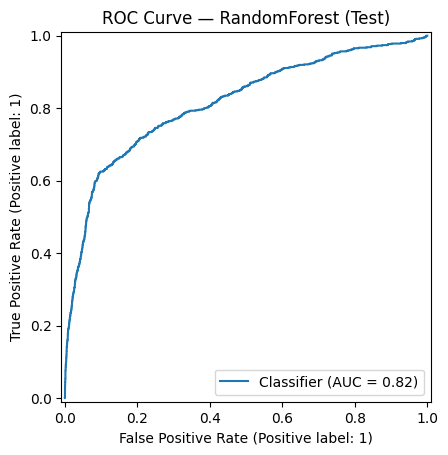

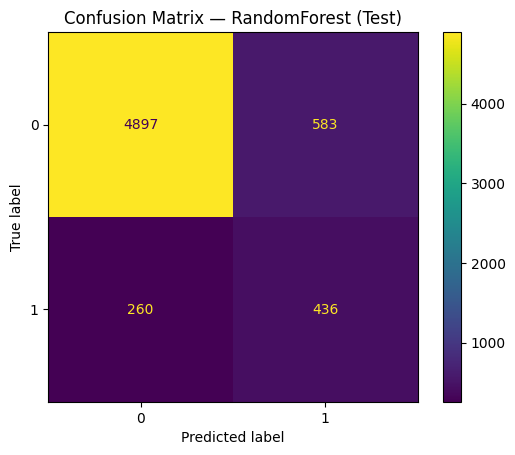


[Test Classification Report]
              precision    recall  f1-score   support

           0      0.950     0.894     0.921      5480
           1      0.428     0.626     0.508       696

    accuracy                          0.864      6176
   macro avg      0.689     0.760     0.715      6176
weighted avg      0.891     0.864     0.874      6176



In [ ]:
# 9. Test evaluation + Plots
final_model.fit(pd.concat([X_train, X_val]), pd.concat([y_train, y_val]))
pred_test = final_model.predict(X_test)
proba_test = final_model.predict_proba(X_test)[:,1]

test_metrics = {
    "model": final_name,
    "test_accuracy": accuracy_score(y_test, pred_test),
    "test_precision": precision_score(y_test, pred_test, zero_division=0),
    "test_recall": recall_score(y_test, pred_test, zero_division=0),
    "test_f1": f1_score(y_test, pred_test, zero_division=0),
    "test_auc": roc_auc_score(y_test, proba_test)
}
print("\n[Test set metrics]")
display(pd.DataFrame([test_metrics]))

# ROC curve
RocCurveDisplay.from_predictions(y_test, proba_test)
plt.title(f"ROC Curve — {final_name} (Test)")
plt.show()

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, pred_test)
plt.title(f"Confusion Matrix — {final_name} (Test)")
plt.show()

print("\n[Test Classification Report]")
print(classification_report(y_test, pred_test, digits=3))


## 3.10 business insights (Chart)

In [ ]:
# 10. Draft business insights

top_sig = param_table.loc[param_table['p_value'] < 0.05].sort_values('odds_ratio', key=lambda s: np.abs(np.log(s)))
display(top_sig.head(10))

def safe_pick(col):
    return col if col in all_names else None

candidates = [
    safe_pick([c for c in all_names if 'poutcome' in c[:20]][0]) if any('poutcome' in c for c in all_names) else None,
    safe_pick([c for c in all_names if 'contact' in c[:20]][0]) if any('contact' in c for c in all_names) else None,
    safe_pick([c for c in all_names if 'euribor' in c[:20]][0]) if any('euribor' in c for c in all_names) else None,
]
print("\n[Insight candidates — check names & translate to business language]")
print(candidates)

,coef,p_value,odds_ratio,or_ci_low,or_ci_high
pdays,-0.001465,6.661548e-10,0.998536,0.998072,0.999001
cons.conf.idx,0.022096,8.130472e-03,1.022342,1.005749,1.039208
campaign,-0.041664,1.359540e-04,0.959192,0.938880,0.979942
day_of_week_wed,0.131775,4.938625e-02,1.140852,1.000354,1.301083
day_of_week_mon,-0.229440,7.445654e-04,0.794978,0.695741,0.908370
previous,-0.283791,9.956556e-11,0.752924,0.690878,0.820542
month_aug,0.311928,8.762133e-03,1.366057,1.081867,1.724898
euribor3m,0.402276,2.257232e-03,1.495225,1.155020,1.935634
month_may,-0.498114,7.460455e-10,0.607676,0.518557,0.712110
month_nov,-0.573786,8.817669e-07,0.563388,0.448192,0.708193



[Insight candidates — check names & translate to business language]
['poutcome', 'contact_cellular', 'euribor3m']
